In [98]:
## San Francisco Rental Prices Dashboard

In [99]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [100]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [101]:
## Import Data

In [102]:
file_path = Path("../Resources/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("../Resources/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [103]:
## Panel Visualizations

In [113]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units_by_year = (sfo_data.groupby('year')['housing_units'].mean())

    return housing_units_by_year.hvplot.bar(x='year', y='housing_units', ylim=(372000, 385000)).opts(title="Housing Units in San Francisco from 2010 to 2016", yformatter="%.0f", width=600)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    avg_gross_rent = (sfo_data.groupby('year')['gross_rent'].mean())

    return avg_gross_rent.plot(label='Average Gross Rent San Francisco')


def average_sales_price():
    """Average Sales Price Per Year."""
    
    avg_price_sqr_ft = (sfo_data.groupby('year')['sale_price_sqr_foot'].mean())

    return avg_price_sqr_ft.plot()


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    neighborhood_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    return neighborhood_df.hvplot(label='Average Price per Square Feet by Year',            x='year', y='sale_price_sqr_foot', groupby='neighborhood')

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    avg_neighborhood_sale_price = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean()

    top_expensive_neighborhood = avg_neighborhood_sale_price.sort_values("sale_price_sqr_foot", ascending = False).head(10).reset_index()

    return top_expensive_neighborhood.hvplot.bar(label='Top 10 Expensive Neighborhoods in San Francisco', x='neighborhood', y='sale_price_sqr_foot', width=1000)

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    avg_neighborhood_sale_price = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean()

    top_expensive_neighborhood = avg_neighborhood_sale_price.sort_values("sale_price_sqr_foot", ascending = False).head(10).reset_index()

    return px.parallel_coordinates(top_expensive_neighborhood, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

def parallel_categories():
    """Parallel Categories Plot."""
    
    avg_neighborhood_sale_price = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean()

    top_expensive_neighborhood = avg_neighborhood_sale_price.sort_values("sale_price_sqr_foot", ascending = False).head(10).reset_index()

    return px.parallel_categories(top_expensive_neighborhood, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

def neighborhood_map():
    """Neighborhood Map"""
    
    neighborhood_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    neighborhood_avg = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean().reset_index()

    neighborhood_avg_locations_join = pd.merge(df_neighborhood_locations, neighborhood_avg, how="inner", left_on='Neighborhood', right_on="neighborhood")

    neighborhood_avg_locations = neighborhood_avg_locations_join.drop(columns='neighborhood')

    map = px.scatter_mapbox(
    neighborhood_avg_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="Neighborhood",
    color_continuous_scale=px.colors.sequential.Inferno
)

    return map

In [115]:
## Panel Dashboard 

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive03804')
    [1] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive03528')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive03654')
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive03660')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive03667')
                    [0] HoloViews(DynamicMap, name='interactive03667')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive03705')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive03791')
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive03797')

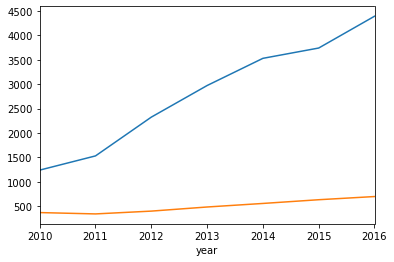

In [118]:
row = pn.Row(housing_units_per_year, average_gross_rent, average_sales_price)

column = pn.Column(average_price_by_neighborhood, top_most_expensive_neighborhoods)

parallel_plots = pn.Column(parallel_coordinates, parallel_categories)

tabs = pn.Tabs(
    ("Welcome", neighborhood_map),
    ("Yearly Market Analysis", row),
    ("Neighborhood Analysis", column),
    ("Parallel Plots Anlysis", parallel_plots))
tabs
